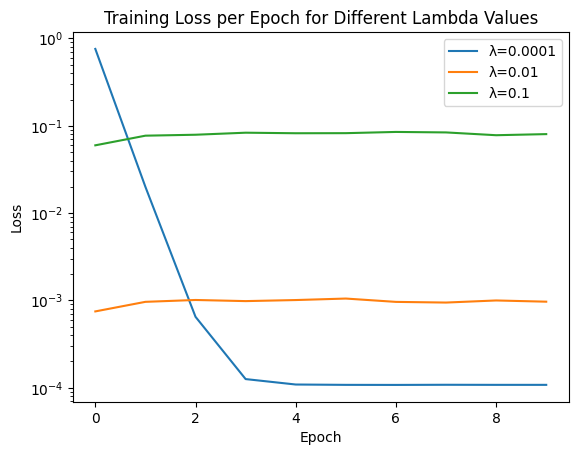

In [11]:
# Cheney Zhang Homework #1 Question #8

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Set up the dataset
def generate_synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = generate_synthetic_data(true_w, true_b, 1000)

# Convert to dataset and dataloader for batch processing
dataset = TensorDataset(features, labels)
batch_size = 10
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize model
model = LinearRegressionModel()

# Loss function
loss_fn = nn.MSELoss()

# Experiment with different values of weight decay
lambdas = [1e-4, 1e-2, 1e-1]
num_epochs = 10
loss_history = {l: {'train': []} for l in lambdas}

# Training loop for each lambda value
for l in lambdas:
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l)

    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch.unsqueeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Record the loss
        with torch.no_grad():
            y_pred = model(features)
            loss = loss_fn(y_pred, labels.unsqueeze(1))
            loss_history[l]['train'].append(loss.item())

# Plotting the results
import matplotlib.pyplot as plt

for l in lambdas:
    plt.plot(loss_history[l]['train'], label=f'λ={l}')

plt.title('Training Loss per Epoch for Different Lambda Values')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()